In [81]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [82]:
from helpers import load_data
from least_squares import *
from ridge_regression import *
from build_polynomial import *
from split_data import *

# load dataset
x, y = load_data()

In [83]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [84]:
def compute_mse(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    N = y.shape[0]
    e = y - tx@w
    return 1/N * 0.5 * e.T@e 

def compute_rmse(y, tx, w):
    return np.sqrt(2 * compute_mse(y, tx, w))


In [104]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    N = y.shape[0]
    poly_x = build_poly(x, degree)

    x_test = poly_x[k_indices[k]]
    y_test = y[k_indices[k]]

    x_train = poly_x[[i for i in range(N) if i not in k_indices[k]]]
    y_train = y[[i for i in range(N) if i not in k_indices[k]]]

    w_optimal, _ = ridge_regression(y_train, x_train, lambda_)
    # w_optimal, _ = least_squares(y_train, x_train)
    
    loss_tr = compute_rmse(y_train, x_train, w_optimal)
    loss_te = compute_rmse(y_test, x_test, w_optimal)
    return loss_tr, loss_te

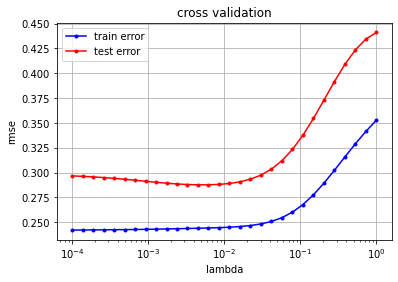

In [105]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []

    for lambda_ in lambdas:
        rmse_te_elmt = 0
        rmse_tr_elmt = 0
        for k in range(k_fold) :
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            rmse_te_elmt += loss_te
            rmse_tr_elmt += loss_tr
        rmse_te_elmt /= k_fold
        rmse_tr_elmt /= k_fold
        
        rmse_te.append(rmse_te_elmt)
        rmse_tr.append(rmse_tr_elmt)

    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

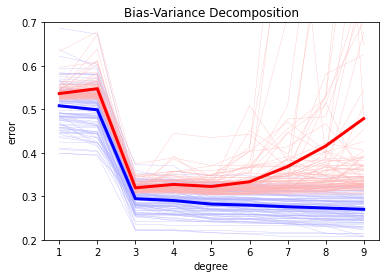

In [108]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    lambda_ = 0.007
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        
        for index_degree, degree in enumerate(degrees) :
            tx = build_poly(x, degree)
            x_train, y_train, x_test, y_test = split_data(tx, y, ratio_train, seed)
            # w_optimal, _ = ridge_regression(y_train, x_train, lambda_)
            w_optimal, _ = least_squares(y_train, x_train)
            rmse_train = compute_rmse(y_train, x_train, w_optimal)
            rmse_test = compute_rmse(y_test, x_test, w_optimal)

            rmse_te[index_seed, index_degree] = rmse_test
            rmse_tr[index_seed, index_degree] = rmse_train

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()